# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 

In [3]:
df = pd.read_csv("train_snli.txt", header=None,sep='\t')
df.head()

,0,1,2
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
2,Children smiling and waving at camera,There are children present,1
3,Children smiling and waving at camera,The kids are frowning,0
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0


# PreProcessing

In [4]:
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [5]:
def preprocess(sentence):
    words = word_tokenize(sentence)
    processed_words = []
    for word in words:
        word = word.lower()
        if word not in stop_words:
            processed_words.append(lemmatizer.lemmatize(word))
    return ' '.join(processed_words)
    # [lemmatizer(word) for word in words]

In [6]:
df[0] = df[0].apply(preprocess)

In [7]:
df[1] = df[1].astype(str).apply(preprocess)

In [8]:
df.head()

,0,1,2
0,person horse jump broken airplane .,"person diner , ordering omelette .",0
1,person horse jump broken airplane .,"person outdoors , horse .",1
2,child smiling waving camera,child present,1
3,child smiling waving camera,kid frowning,0
4,boy jumping skateboard middle red bridge .,boy skate sidewalk .,0


# Analysis

2
0    183966
1    183407
Name: count, dtype: int64


Text(0.5, 1.0, 'Hypothesis Length')

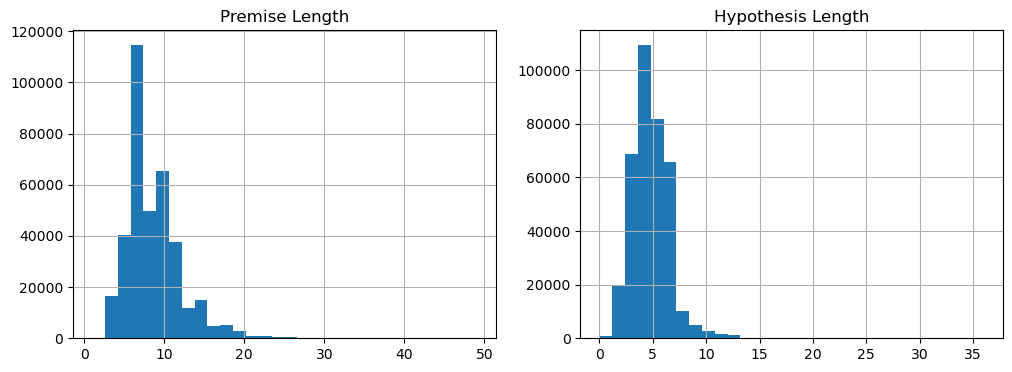

In [9]:
# checking class distribution
print(df[2].value_counts())

# checking text length distributions
plt.figure(figsize=(12, 4))
plt.subplot(121)
df[0].str.split().apply(len).hist(bins=30)
plt.title('Premise Length')
plt.subplot(122)
df[1].str.split().apply(len).hist(bins=30)
plt.title('Hypothesis Length')